In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
astro1 = pd.read_csv('split_astro_ds_1.csv', low_memory = False)
astro2 = pd.read_csv('split_astro_ds_2.csv', low_memory = False)

# L X W X H

astro2.columns = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'n_obs_used', 'H',
       'diameter', 'extent', 'albedo', 'rot_per']
astro2['GM'] = pd.NA
astro2['BV'] = pd.NA
astro2['UB'] = pd.NA
astro2['IR'] = pd.NA
astro2['spec_B'] = pd.NA
astro2['spec_T'] = pd.NA
astro = pd.concat([astro1, astro2])

In [3]:
astro.drop('n_obs_used', axis = 1)
astrotrain = astro.drop(['spec_B', 'spec_T', 'BV', 'UB', 'IR', 'extent', 'GM', 'rot_per'], axis = 1)
astrotrain = astrotrain.dropna()
print(astrotrain)

            a       e      i      om       w      q    ad  per_y  n_obs_used  \
0       2.767  0.0788  10.59   80.26   73.47  2.549  2.99   4.60        1075   
1       2.770  0.2301  34.93  172.92  310.86  2.132  3.41   4.61        9049   
2       2.670  0.2565  12.99  169.84  247.74  1.985  3.35   4.36        7445   
3       2.363  0.0888   7.14  103.76  151.60  2.153  2.57   3.63        9451   
4       2.579  0.1879   5.36  141.52  358.89  2.094  3.06   4.14        3454   
...       ...     ...    ...     ...     ...    ...   ...    ...         ...   
439782  3.142  0.0809  14.75  303.10   20.16  2.888  3.40   5.57         155   
439822  3.197  0.2532  12.33  205.44   54.09  2.387  4.01   5.72         187   
439952  2.303  0.1981  23.54  326.93   34.29  1.847  2.76   3.50          78   
439963  3.064  0.1798  15.17  320.11  290.17  2.513  3.62   5.36          66   
439968  2.352  0.2574   3.39  264.99   57.78  1.747  2.96   3.61         133   

            H  diameter  albedo  
0    

Variance ratio array: [3.45068075e-01 1.99264189e-01 1.12824730e-01 9.22577744e-02
 7.61329767e-02 7.34837910e-02 6.54206793e-02 3.06307437e-02
 4.04659873e-03 6.40966655e-04 2.28887009e-04 5.88232747e-07]


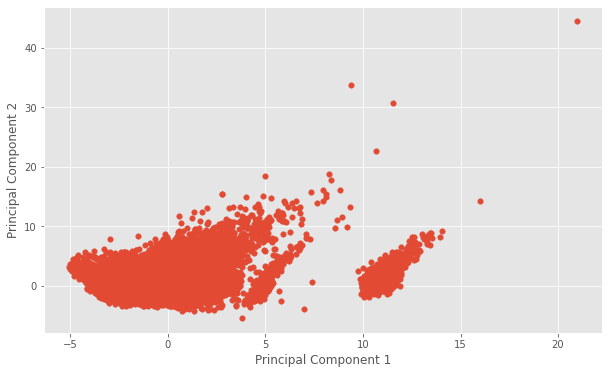

In [4]:
astro_scale = scale(astrotrain)
pca_model = PCA()
X_PCA = pca_model.fit_transform(astro_scale)

var_ratio = pca_model.explained_variance_ratio_
print(f"Variance ratio array: {var_ratio}")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], s=30)
plt.show()

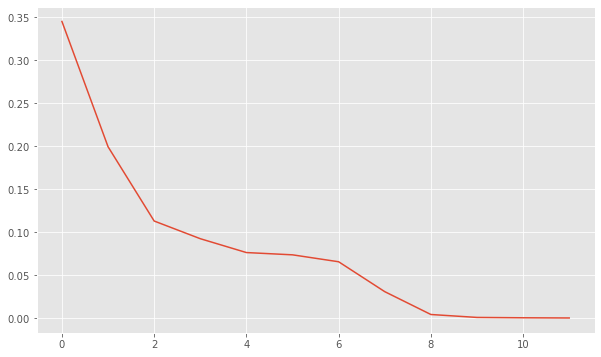

In [5]:
plt.plot(var_ratio)

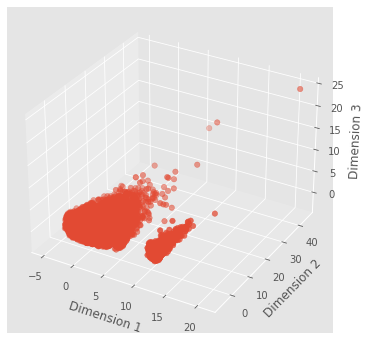

In [6]:
# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],zs= X_PCA[:, 2], s=30)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

In [8]:
# now cutting down to what we already know
astro_group = astro1.drop(['n_obs_used', 'extent', 'rot_per'], axis = 1)
print(len(astro_group))

astro_group['IsUseful'] = np.nan

astro_group = astro_group.dropna(subset=['spec_T', 'spec_B'], how='all')
astro_group.reset_index(drop=True, inplace=True)

for i in range(len(astro_group)):
    specB = astro_group['spec_B'][i]
    specT = astro_group['spec_T'][i]
    
    astro_group['IsUseful'][i] = 0
    if specT == "M" or specT == "R" or specT == "Q":
        astro_group['IsUseful'][i] = 1
    if (specB == "Sq" or specB == "Sr" or specB == "X" or specB == "Xc" or specB == "Xe"):
        astro_group['IsUseful'][i] = 1

            
print(astro_group)
print(astro_group['IsUseful'].value_counts())

608436


/var/folders/3k/1g15hd5x59z0f9t0pjs2kf3r0000gn/T/ipykernel_17153/2256516675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astro_group['IsUseful'][i] = 0
/var/folders/3k/1g15hd5x59z0f9t0pjs2kf3r0000gn/T/ipykernel_17153/2256516675.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astro_group['IsUseful'][i] = 1
/var/folders/3k/1g15hd5x59z0f9t0pjs2kf3r0000gn/T/ipykernel_17153/2256516675.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

          a       e      i      om       w      q    ad  per_y      H  \
0     2.767  0.0788  10.59   80.26   73.47  2.549  2.99   4.60   3.33   
1     2.770  0.2301  34.93  172.92  310.86  2.132  3.41   4.61   4.12   
2     2.670  0.2565  12.99  169.84  247.74  1.985  3.35   4.36   5.15   
3     2.363  0.0888   7.14  103.76  151.60  2.153  2.57   3.63   3.22   
4     2.579  0.1879   5.36  141.52  358.89  2.094  3.06   4.14   7.00   
...     ...     ...    ...     ...     ...    ...   ...    ...    ...   
1737  2.238  0.1911   4.71  265.14   81.67  1.810  2.67   3.35  13.88   
1738  2.790  0.1747   8.66  337.97   39.11  2.302  3.28   4.66  14.01   
1739  1.969  0.0579  18.26  264.42  286.61  1.855  2.08   2.76  15.83   
1740  3.497  0.5336  21.35  129.43   43.63  1.631  5.36   6.54  16.04   
1741  3.575  0.6000   8.14   69.31   53.59  1.430  5.72   6.76  14.36   

      diameter  albedo         GM     BV     UB  IR spec_B spec_T  IsUseful  
0      939.400  0.0900  62.628400  0.713  0.4

0.0    1436
1.0     269
Name: IsUseful, dtype: int64
Variance ratio array: [3.70486917e-01 1.28260353e-01 1.05333370e-01 9.30264939e-02
 8.56878705e-02 7.43446695e-02 7.11738848e-02 5.45489552e-02
 1.62706972e-02 5.74623055e-04 2.91630352e-04 5.34881282e-07]


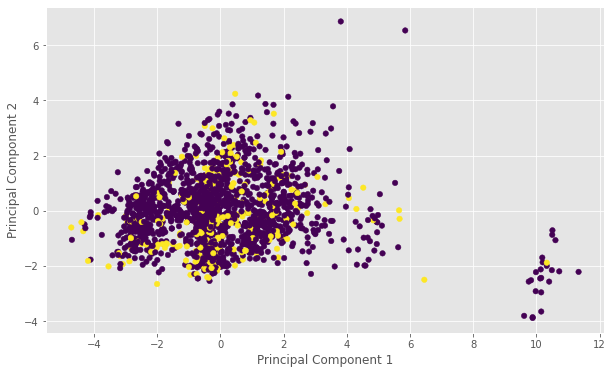

In [11]:
from pandas.plotting import scatter_matrix

astro_clear =astro_group.drop(['spec_B', 'spec_T', 'BV', 'UB', 'IR', 'GM'], axis = 1)
astro_clear = astro_clear.dropna()
print(astro_clear['IsUseful'].value_counts())

astrogroup_scale = scale(astro_clear)
pca_model = PCA()
G_PCA = pca_model.fit_transform(astrogroup_scale)

var_ratio = pca_model.explained_variance_ratio_
print(f"Variance ratio array: {var_ratio}")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

y_change = astro_clear['IsUseful']

plt.scatter(G_PCA[:, 0], G_PCA[:, 1], c=y_change, s=30)
plt.show()

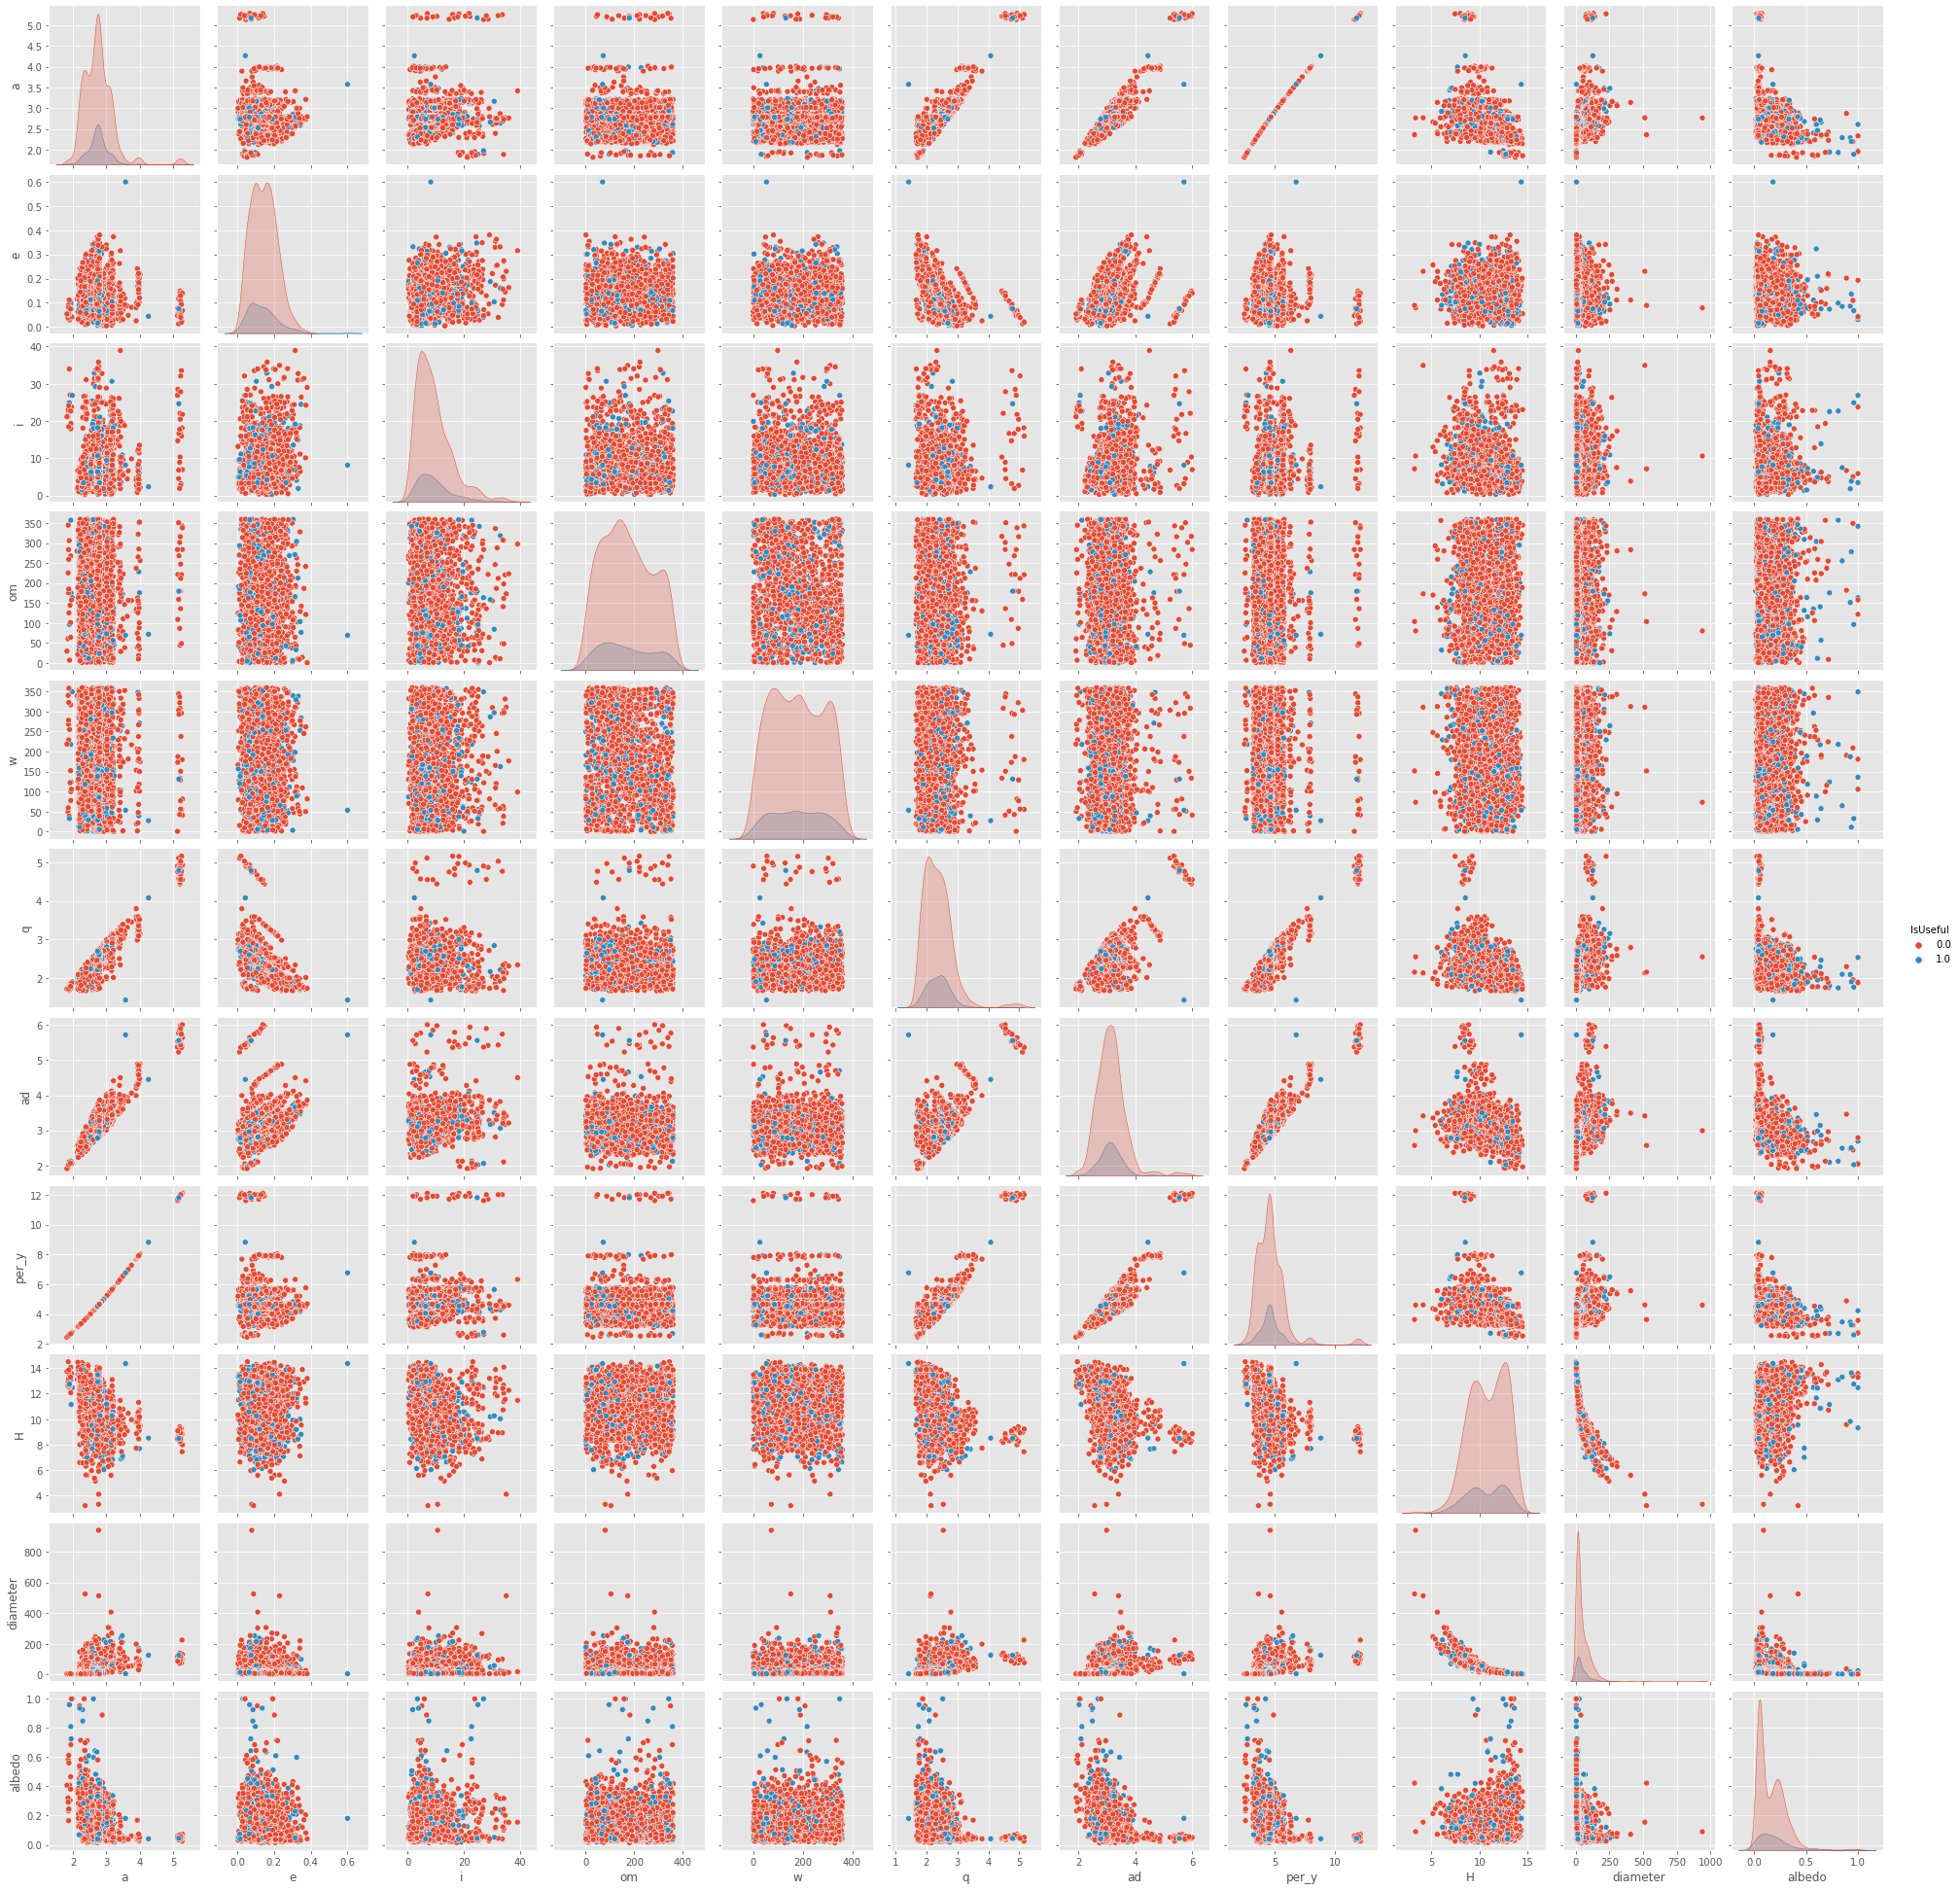

In [14]:
sns.pairplot(astro_clear, hue="IsUseful")

In [ ]:
"""
IDEAS:
1. use regex to read extent, get the volume and replace value
    a. Or use the extent to determine if it's more spherical or oblong


"""